# Task description

Download the "Titanic disaster" dataset available at Kaggle. Using `pandas`:
1. Check what features are available in the dataset.
2. Clean the data if required.
3. Create a pie chart representing the male/femal proportion.
4. Create a scatterplot with the "Faye payed" and the "Age", differ the plot color by gender.
5. Check how many people survived.
6. Creat a histogram with the "Fare payed".
7. Create you own question and aswer them!

# Solution

First we import all the necessary libraries and set `matplotlib`'s global settings (for bigger charts and finer text).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]
matplotlib.rc('font', family='Lato', size=16)

## Reading the data

We define path to the data file

In [2]:
DATA_PATH = r"data/train.csv"

We can then create data frame and take a peek at it

In [3]:
data = pd.read_csv(DATA_PATH)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The dataset consist of 10 features: 
1. Survived - did the person survived the disaster. 1 = Yes, 0 = No.
2. Pclass - ticked class.
3. Sex - sex of the person.
4. Age - age of the person in years.
5. SibSp - number of siblings / spouses aboard the Titanic.
6. Parch - number of parents / children aboard the Titanic.
7. Ticket - ticket number.
8. Fare - passenger fare.
9. Cabin - number of the cabin.
10. Embarked - port of embarkation. C = Cherbourg, Q = Queenstwon, S = Southampton.

The data consist of 891 rows and 12 columns.

In [4]:
data.shape

(891, 12)

## Cleaning the data
As always it is important to check if the data contains any missing values.

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see that only missing features are **Age**, **Cabin** and **Embarked**. If we will consider those columns in our analysis, we have to remember to either remove them or mark them accordingly.

### Male / female proportion

We will count how many people of each sex were aboard the Titanic.

In [6]:
sex_count = data.groupby(by='Sex').count()['PassengerId']
sex_count

Sex
female    314
male      577
Name: PassengerId, dtype: int64

And then we generate rather underwhelming pie chart:

findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


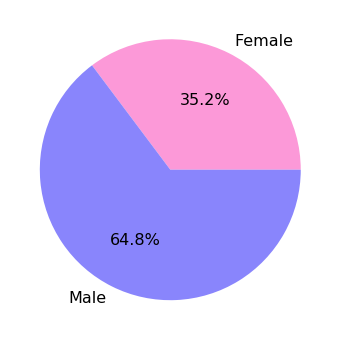

In [7]:
plt.pie(sex_count, labels=['Female', 'Male'], 
        autopct='%1.1f%%', 
        colors=['#fc99d8', '#8985fc'], 
        textprops={'fontsize': 16})
plt.show()

### Scatter plot

Now we will create a scatterplot with the "Fare payed" and the "Age". Color of each point will be based on sex of the person.

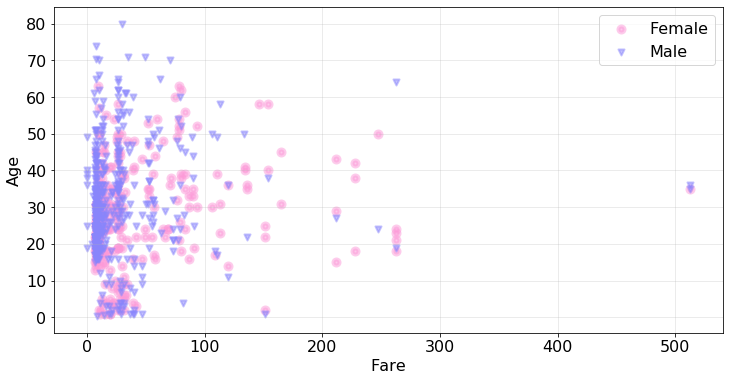

In [8]:
data_copy = data.dropna(subset=['Age'])
females = data_copy[data_copy['Sex'] == 'female']
males = data_copy[data_copy['Sex'] == 'male']
plt.scatter(females['Fare'], females['Age'], c='#fc99d8', label='Female', marker='o', linewidths=4, alpha=0.5)
plt.scatter(males['Fare'], males['Age'], c='#8985fc', label='Male', marker='v', linewidths=2, alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('Age')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### How many people survived?

Let's now check how many people survived.

In [9]:
data['Survived'].sum()

342

It is better to check what percentage of all travelers it was.

In [10]:
data['Survived'].sum() / data.shape[0]

0.3838383838383838

### Histogram with the fare payed

We will now creat a histogram with the fare payed.

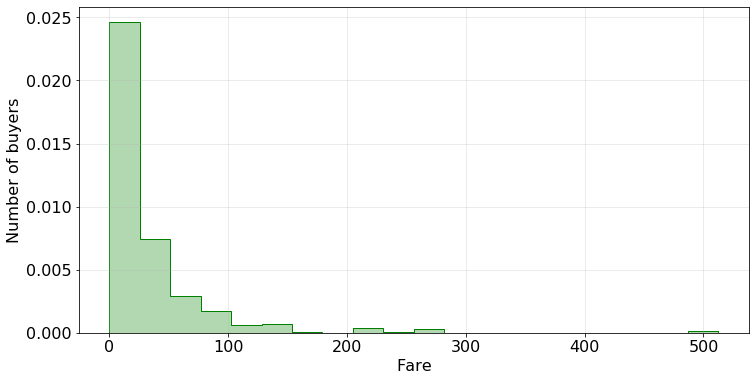

In [11]:
plt.hist(data['Fare'], bins=20, density=True, color='g', alpha=0.3)
plt.hist(data['Fare'], bins=20, density=True, color='g', histtype='step')
plt.xlabel('Fare')
plt.ylabel('Number of buyers')
plt.grid(alpha=0.3)
plt.show()

# My own questions, yay!

### Did fare had any impact on traveler survivor?

Let's create individual data frames for victims and survivors.

In [12]:
victims = data[data['Survived'] == 0]
survivors = data[data['Survived'] == 1]

We can then check the average fare in each group

In [13]:
print(f"Victims: {victims['Fare'].mean()}")
print(f"Survivors: {survivors['Fare'].mean()}")

Victims: 22.117886885245902
Survivors: 48.39540760233918


So, on average, survivor payed more than two times the fare of a victim. Interesting. Let's investigate the medians.

In [14]:
print(f"Victims: {victims['Fare'].median()}")
print(f"Survivors: {survivors['Fare'].median()}")

Victims: 10.5
Survivors: 26.0


Very similar result. And now the histograms.

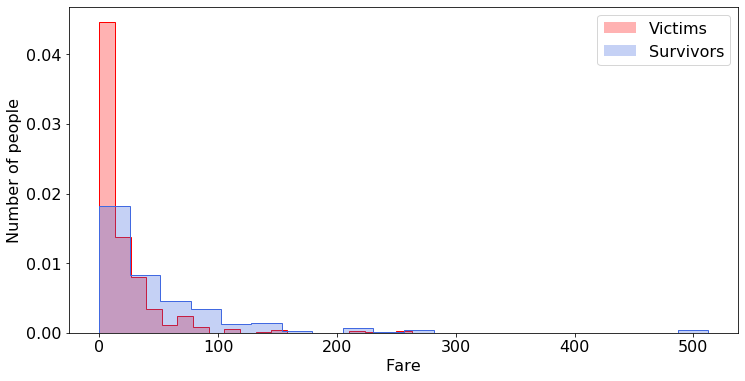

In [15]:
plt.hist(victims['Fare'], bins=20, density=True, color='r', histtype='step')
plt.hist(victims['Fare'], bins=20, density=True, color='r', label='Victims',
         alpha=0.3)
plt.hist(survivors['Fare'], bins=20, density=True, color='royalblue', 
         histtype='step')
plt.hist(survivors['Fare'], bins=20, density=True, color='royalblue', 
         label='Survivors', alpha=0.3)
plt.xlabel('Fare')
plt.ylabel('Number of people')
plt.legend()
plt.show()

That's not an in-depth analysis, but certainly something's going on.

And we have one more observation to add! It was the worker Jake who didn't fit on the door and froze to death, while his aristocrat lover lived to very old age! [[1]](https://en.wikipedia.org/wiki/Titanic_(1997_film))

### Alone people

Thinking about 1912 we could assume that meeting woman traveling alone across Atlantic, would be rather unusual. Let's check if the data confirms, in any way, our prejudices.

In [16]:
alone = data[(data['SibSp'] == 0) & (data['Parch'] == 0)]
alone_by_sex = alone.groupby(by='Sex').count()['PassengerId']

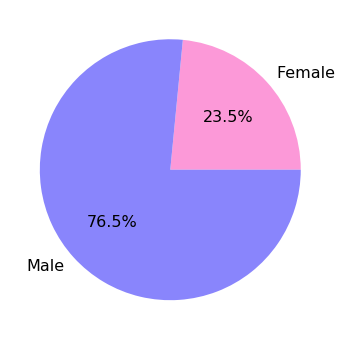

In [17]:
plt.pie(alone_by_sex, labels=['Female', 'Male'], 
        autopct='%1.1f%%', 
        colors=['#fc99d8', '#8985fc'], 
        textprops={'fontsize': 16})
plt.show()

I would say that this chart doesn't really show much and we shouldn't jump to any conclusions.

We can also take a peek if there were any surprisingly young lone travelers

In [18]:
alone[alone['Age'] <= 15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C


Especially interesting of those would be the youngest one: 5 years old Miss Virginia Ethel Emanuel. How could she travel alone at such a young age? According to [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/titanic-survivor/virginia-ethel-emanuel.html) she was accompanied by her nursemaid, who is not a family member, thus is not included in the statistic.

### Youngest passenger

Wikipedia lists Miss [Millvina Dean](https://en.wikipedia.org/wiki/Millvina_Dean) as the youngest Titanic passenger and the last survivor but interestingly she can not be found in the dataset.

In [19]:
data[data['Name'].str.contains('Dean')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.575,NaN,S
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.575,NaN,S


It instead lists Mister [As'ad Tannūs](https://www.encyclopedia-titanica.org/titanic-survivor/assad-alexander-thomas-tannous.html) as the youngest passenger at age of just over five months!

In [20]:
data.sort_values(by='Age').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
